In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r"C:\Users\VTS\Downloads\ML Lithium Ion Battery\MaterialsProjectLiIonBattery.csv")

# Display the first few rows of the DataFrame
print(df.head())

     battery_id  id_charge id_discharge battery_formula framework_formula  \
0      mp-28_Li      mp-28   mp-1185231         Li0-3Ce                Ce   
1  mp-573471_Li  mp-573471   mp-1198729    Li4.25-4.4Sn                Sn   
2      mp-80_Li      mp-80      mp-7955         Li0-3Sb                Sb   
3     mp-124_Li     mp-124    mp-865875         Li0-3Ag                Ag   
4  mp-568806_Li  mp-568806   mp-1001581       Li0-0.17C                 C   

  formula_discharge formula_charge working_ion     V_avg  capacity_grav  \
0             Li3Ce             Ce          Li -0.444846     499.595769   
1           Li22Sn5        Li17Sn4          Li -0.840299      26.936090   
2             Li3Sb             Sb          Li  1.099595     563.913254   
3             Li3Ag             Ag          Li  0.163836     624.785871   
4              LiC6              C          Li  0.288598     339.236925   

   capacity_vol  energy_grav   energy_vol  max_delta_volume  stability_charge  \
0   1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   battery_id           2434 non-null   object 
 1   id_charge            2434 non-null   object 
 2   id_discharge         2434 non-null   object 
 3   battery_formula      2434 non-null   object 
 4   framework_formula    2434 non-null   object 
 5   formula_discharge    2434 non-null   object 
 6   formula_charge       2434 non-null   object 
 7   working_ion          2434 non-null   object 
 8   V_avg                2434 non-null   float64
 9   capacity_grav        2434 non-null   float64
 10  capacity_vol         2434 non-null   float64
 11  energy_grav          2434 non-null   float64
 12  energy_vol           2434 non-null   float64
 13  max_delta_volume     2434 non-null   float64
 14  stability_charge     2434 non-null   float64
 15  stability_discharge  2434 non-null   f

In [4]:
df.describe()

,V_avg,capacity_grav,capacity_vol,energy_grav,energy_vol,max_delta_volume,stability_charge,stability_discharge
count,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,3.210695,131.830743,459.176771,415.831455,1456.902915,0.079006,0.125623,0.099119
std,3.264660,85.239210,278.639534,385.483843,1516.330198,0.585845,0.392769,0.353154
min,-8.232535,5.962835,34.971189,-878.998433,-2471.748643,0.000012,0.000000,0.000000
25%,2.396534,76.032843,262.571688,215.004126,727.877111,0.014012,0.041626,0.025142
50%,3.148791,116.112617,395.610157,367.218988,1243.907345,0.034364,0.071341,0.046182
75%,3.800609,169.057549,589.783370,543.408155,1884.205172,0.064956,0.098390,0.077115
max,93.960208,1320.248328,2236.418805,4392.823543,23924.335703,16.140246,6.486322,5.891292


In [ ]:
# Drop the unnecessary columns
drop_cols = ['battery_id', 'id_charge', 'id_discharge',
             'battery_formula', 'framework_formula',
             'formula_discharge', 'formula_charge', 'working_ion']
df_clean = df.drop(columns=drop_cols)

# Delete null data (?)
df_clean = df_clean.dropna()

# Target variable
target = 'stability_charge' #equivalent to Formation Energy (?)
X = df_clean.drop(columns=[target]) #'Horizontal' var
y = df_clean[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

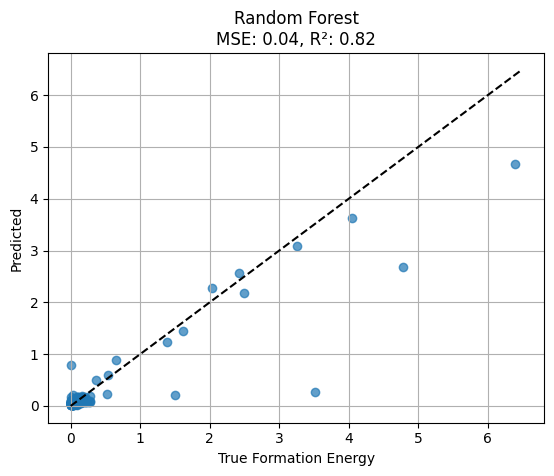

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

plt.figure()
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("True Formation Energy")
plt.ylabel("Predicted")
plt.title(f"Random Forest\nMSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")
plt.grid()
plt.show()


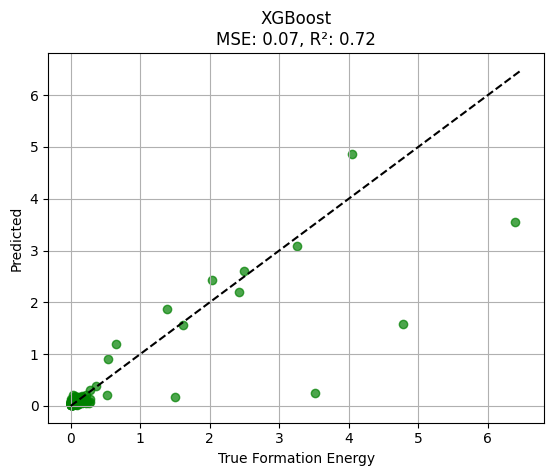

In [13]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

plt.figure()
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("True Formation Energy")
plt.ylabel("Predicted")
plt.title(f"XGBoost\nMSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}")
plt.grid()
plt.show()


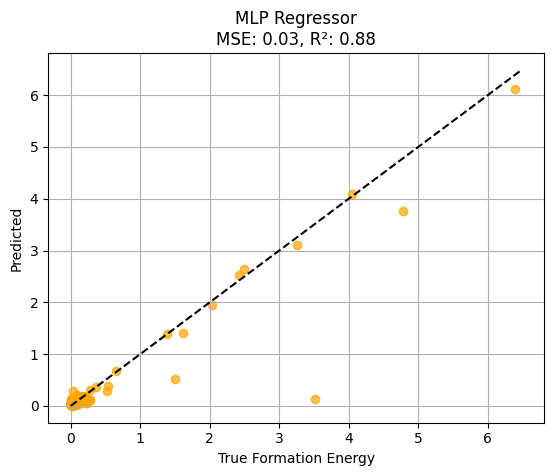

In [14]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

plt.figure()
plt.scatter(y_test, y_pred_mlp, alpha=0.7, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("True Formation Energy")
plt.ylabel("Predicted")
plt.title(f"MLP Regressor\nMSE: {mse_mlp:.2f}, R²: {r2_mlp:.2f}")
plt.grid()
plt.show()
